In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from python_analysis import *
import matplotlib.animation as animation
from numpy import random

In [2]:
# impose dimensions of figures and font

plt.rcParams["figure.figsize"] = (25,15)
plt.rcParams.update({'font.size': 23})

# MOL for (1+1) dimensional system of equation

In [57]:
ns1 = 35
names = []
shift1 = 34
for i in range(shift1,ns1):
    names.append( pd.read_csv("./data/wave_equation/data"+str(i)+"/names_file.csv") )
    #print(names[i].name.size)
    
ns = 8
shift = 5
for i in range(shift,ns):
    names.append( pd.read_csv("./data/log_comp/data"+str(i)+"/names_file.csv") )
# wave eq. radiative bound for PI, no bound for PI.
#  no dissipation
# step 200
#time 20
#data0 dx=0.1
#data1 dx=0.05
#data2 dx=0.01
#data3 dx=0.05 -> ad hoc ghost extr.

#int_time=20
#spherical wave eq
#data4 dx=0.05  2 ord ghost_extr
#data5 dx=0.05 6 ord ghost extr spherical simm
#data6 "..." 4 ord ghost extr sherical simm
#data7 dx=0.01 4 ord ghost extr sherical simm
#data8 "dx = 0.05                " + art diss eps=0.02
#data9 "..." eps=0.01
#data10 eps=0.03
#data11 eps=0.0005
#data12 eps=0.0001
#data13 dx=0.005, 4 ord gp extr, no diss
#data14 dx=0.05 epsilom=0.025
#data15 eps=0.04
#data16 eps=0.05
#data17 eps=0.075
#data18 eps=0.1

#dx=0.01
#data19 = data7 but the runtime is 40 (before was 20)
#data20 "..." Husa art diss eps=0.02
#data21 = ... , eps=0.05
#data22= ... eps=0.01
#data23= ... eps=0.0075
#data24= ... eps=0.015
#data25= ... eps=0.0125
#data26      eps=0.009
#data27      eps=?
#data28      eps=?
#data29      
#data30 dx=0.005 eps= 0.0075

# for comparison with model 1, spherical symmetrical wave equation
#data31 dx=0.05, time_int = 10, step to save=250, eps=0
#data32 dx=0.05 time_int=10, step to save = 250, eps=0, initial Phi=null,initial PI =exp(x^2) * a, a=2
#data33 is data 32 wih dx=0.01 + art diss: eps=0.02
#data34 amplitude=10, dx=0.01, t=10, step=250, initial PI =-exp(x^2) * a, a=2

# here something wrong was happening
#model1
#data0 dx=0.05, ampl=1
#data1  ampl=2
#data2 amol=5
#data3 ampl=20
#data4 ampl=50

# here we use
#dx=0.01
#focus on the beginning of the evolution
#data5 (data32) but we have model1_PI instead of spherical_wave_eq
#data6 is data 5 but we add art diss. eps= 0.02
#data7 dx =0.01, t=10, step=250, eps=0, amplitude=10

In [58]:
range_time = 10
number_step = 250
len_step = range_time / number_step
times = np.arange(0,range_time+len_step,len_step)
times.size

251

In [59]:

big_DF = []

for n in range(0,ns1-shift1):
    # read the datas and put them in a Panda's database 
    DF1 = []
    for i in range(0,int(names[n].name.size/3)):
        df = pd.read_csv(names[n].name[i])
        DF1.append(df)

    DF2 = []
    for i in range(int(names[n].name.size/3),int(2*names[n].name.size/3)):
        df = pd.read_csv(names[n].name[i])
        DF2.append(df)

    DF3 = []
    for i in range(int(2*names[n].name.size/3),int(names[n].name.size)):
        df = pd.read_csv(names[n].name[i])
        DF3.append(df)
    DF = [DF1,DF2,DF3]
    #print(DF1[0].size)
    #print(DF2[0].size)
    #print(DF3[0].size)
    print("data"+str(n+shift1)+" added")
    big_DF.append(DF)

for n in range(0,ns-shift):
    # read the datas and put them in a Panda's database 
    DF1 = []
    for i in range(0,int(names[n].name.size/3)):
        df = pd.read_csv(names[n].name[i])
        DF1.append(df)

    DF2 = []
    for i in range(int(names[n].name.size/3),int(2*names[n].name.size/3)):
        df = pd.read_csv(names[n].name[i])
        DF2.append(df)

    DF3 = []
    for i in range(int(2*names[n].name.size/3),int(names[n].name.size)):
        df = pd.read_csv(names[n].name[i])
        DF3.append(df)
    DF = [DF1,DF2,DF3]
    #print(DF1[0].size)
    #print(DF2[0].size)
    #print(DF3[0].size)
    print("data"+str(n+shift)+" added")
    big_DF.append(DF)


data34 added
data5 added
data6 added
data7 added


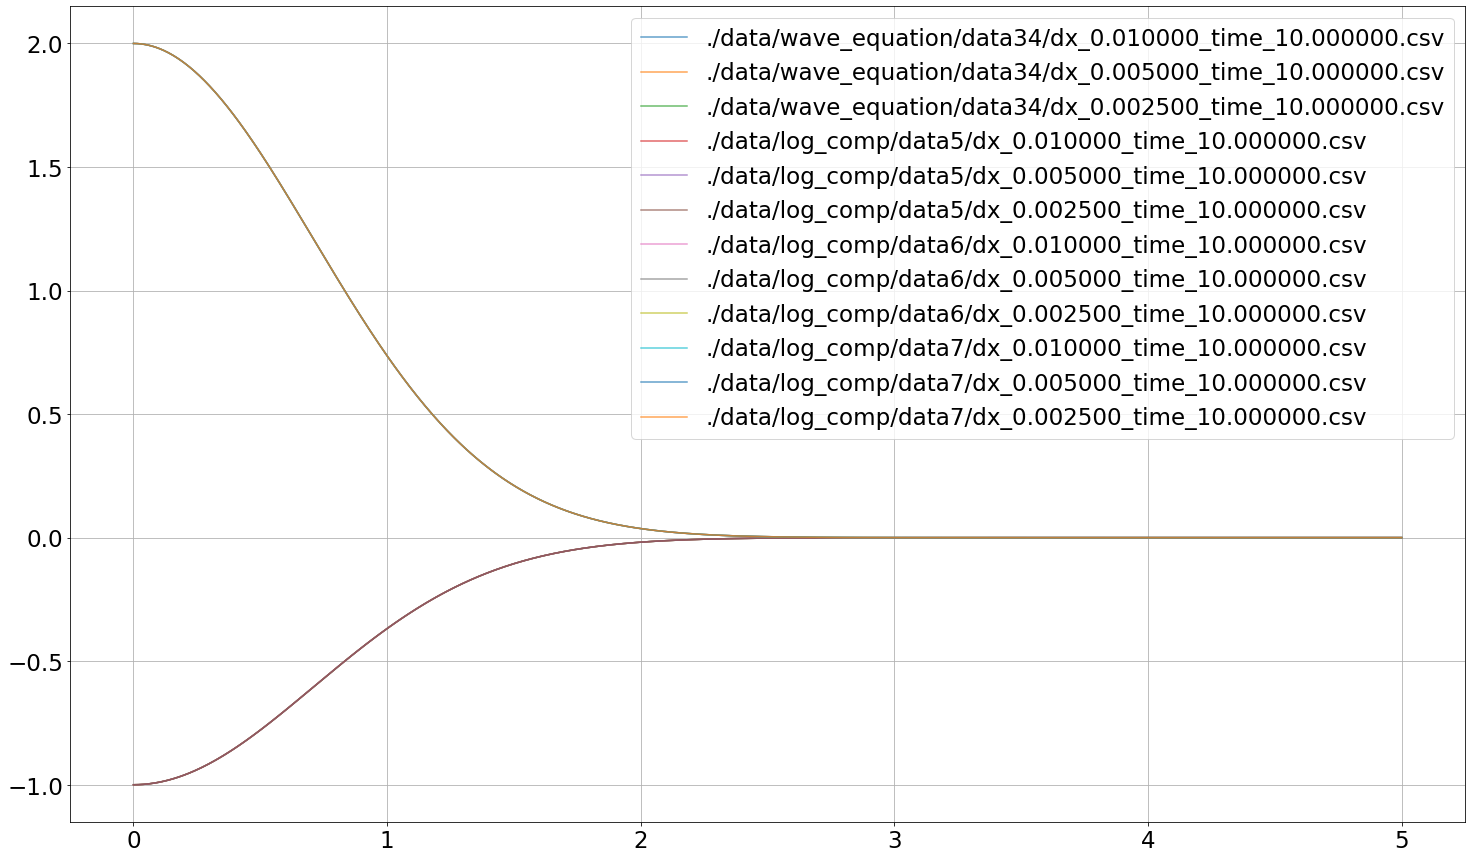

In [60]:
for n in range(0,4):
    for i in range(0,3):
        #plt.plot(DF[i][1]['x'],initialize_func_vect(gauss_PI,DF[i][1]['x'],DF[i][1]['x'][1]-DF[i][1]['x'][1],times[1]),'+',alpha=0.7,label="theo",markersize=15)
        plt.plot(big_DF[n][i][-1]['x'],big_DF[n][i][0]['field0'],alpha=0.7,label=names[n].name[int(names[n].name.size/3)*(i+1)-1],markersize=25)
        #plt.plot(DF[i][-1]['x'],DF[i][0]['field1']-initialize_func_vect(gauss_PI,DF[i][10]['x'],DF[i][10]['x'][10]-DF[i][10]['x'][10],times[-1]),alpha=0.7,label=names.name[int(names.name.size/3)*(i+1)-1],markersize=25)


    #plt.plot(DF[-1][-1]['x'],(DF[-1][-1]['x']*0+times[-1])*4,'.',alpha=0.4,label='theoretical',markersize=15)
    #plt.plot(DF[-1][-1]['x'],2*(DF[-1][-1]['x'])**2+2*times[-1]**2,'.',alpha=0.4,label='theoretical',markersize=15)

plt.legend()
plt.grid()
    #plt.xlim([-0.1, 0.1])
    #plt.ylim([-0.01, 0.01])

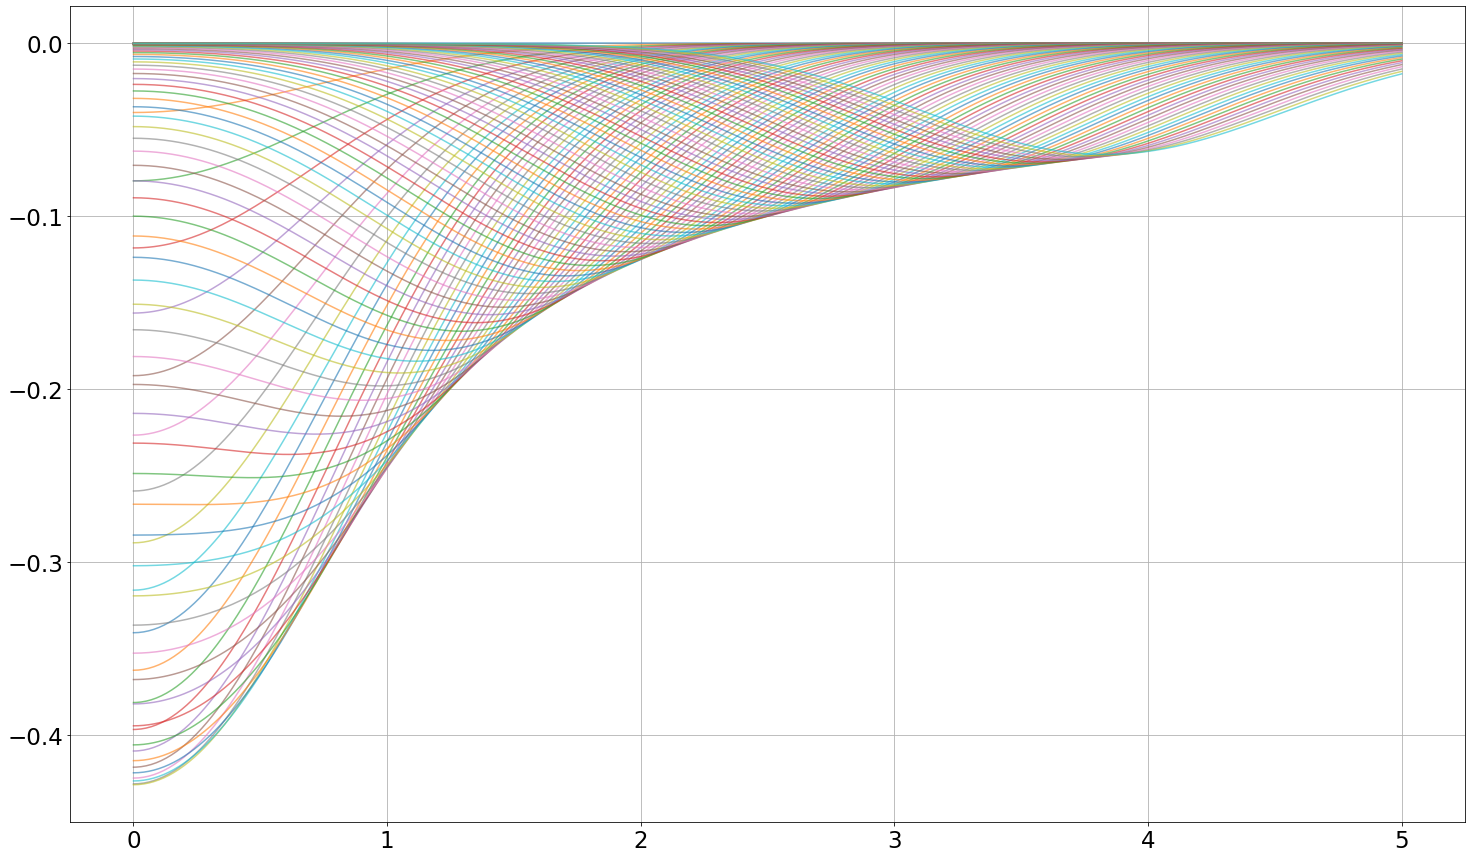

In [64]:
""""
for i in range(0,0):
        for j in range(39,40):
            plt.plot(big_DF[0][i][j]['x'],big_DF[0][i][j]['field0'],alpha=0.6,label=names[n].name[int(names[n].name.size/3)*(i+1)-1],markersize=25)
            #plt.plot(DF[i][j]['x'],DF[i][j]['field1'],alpha=0.7,label=names.name[int(names.name.size/3)*(i+1)-1],markersize=25)
            #plt.plot(DF[i][j]['x'],DF[i][j]['field2'],alpha=0.7,label=names.name[int(names.name.size/3)*(i+1)-1],markersize=25)
            #plt.plot(DF[i][j]['x'],initialize_func_vect(gauss_PI,DF[i][0]['x'],DF[i][0]['x'][0]-DF[i][0]['x'][10],times[j]),'.-',alpha=0.6,label="theo",markersize=5)
"""
for n in [0]:
    for i in range(0,1):
        for j in range(0,100):
            plt.plot(big_DF[n][i][j]['x'],big_DF[n][i][j]['field2'],alpha=0.6,label=names[n].name[int(names[n].name.size/3)*(i+1)-1],markersize=15)
            #plt.plot(big_DF[n][i][j]['x'],big_DF[n][i][j]['field0'],alpha=0.6,label=names[n].name[int(names[n].name.size/3)*(i+1)-1],markersize=15)
            #plt.plot(DF[i][j]['x'],DF[i][j]['field2'],alpha=0.7,label=names.name[int(names.name.size/3)*(i+1)-1],markersize=25)
            #plt.plot(DF[i][j]['x'],initialize_func_vect(gauss_PI,DF[i][0]['x'],DF[i][0]['x'][0]-DF[i][0]['x'][10],times[j]),'.-',alpha=0.6,label="theo",markersize=5)
            #plt.plot(big_DF[n][i][j]['x'],+big_DF[n][i][j]['field0']/(1-big_DF[n][i][j]['field2']),'+-',alpha=0.3,label=names[n].name[int(names[n].name.size/3)*(i+1)-1],markersize=15)
            #plt.plot(big_DF[n][i][j]['x'],np.log(1+big_DF[n][i][j]['field2']),'.-',alpha=0.5,label=names[n].name[int(names[n].name.size/3)*(i+1)-1],markersize=10)
            #plt.plot(big_DF[n][i][j]['x'],np.sin(-np.log(1-big_DF[n][i][j]['field2'])),'.-',alpha=0.5,label=names[n].name[int(names[n].name.size/3)*(i+1)-1],markersize=10)

            
for n in []:
    for i in range(0,1):
        for j in range(149,150):
            plt.plot(big_DF[n][i][j]['x'],big_DF[n][i][j]['field0'],alpha=0.6,label=names[n].name[int(names[n].name.size/3)*(i+1)-1],markersize=15)
            #plt.plot(big_DF[n][i][j]['x'],big_DF[n][i][j]['field2'],alpha=0.4,label=names[n].name[int(names[n].name.size/3)*(i+1)-1],markersize=20)

            
plt.grid()
#plt.xlim([0,0.5])
#plt.ylim([ 1.75,1.8] )
#plt.legend()


In [576]:
# conv_test_vect = []
for i,t in enumerate(times):
    conv_test_vect.append(conv_test(DF2[i],DF3[i],gauss_PI,t))
#print(conv_test_vect)
plt.plot(times,conv_test_vect)
#plt.xlim(40,80)
#plt.ylim(1.8,2.2)
#plt.vlines(47,2,0,alpha=0.2)
plt.grid()


NameError: name 'conv_test_vect' is not defined

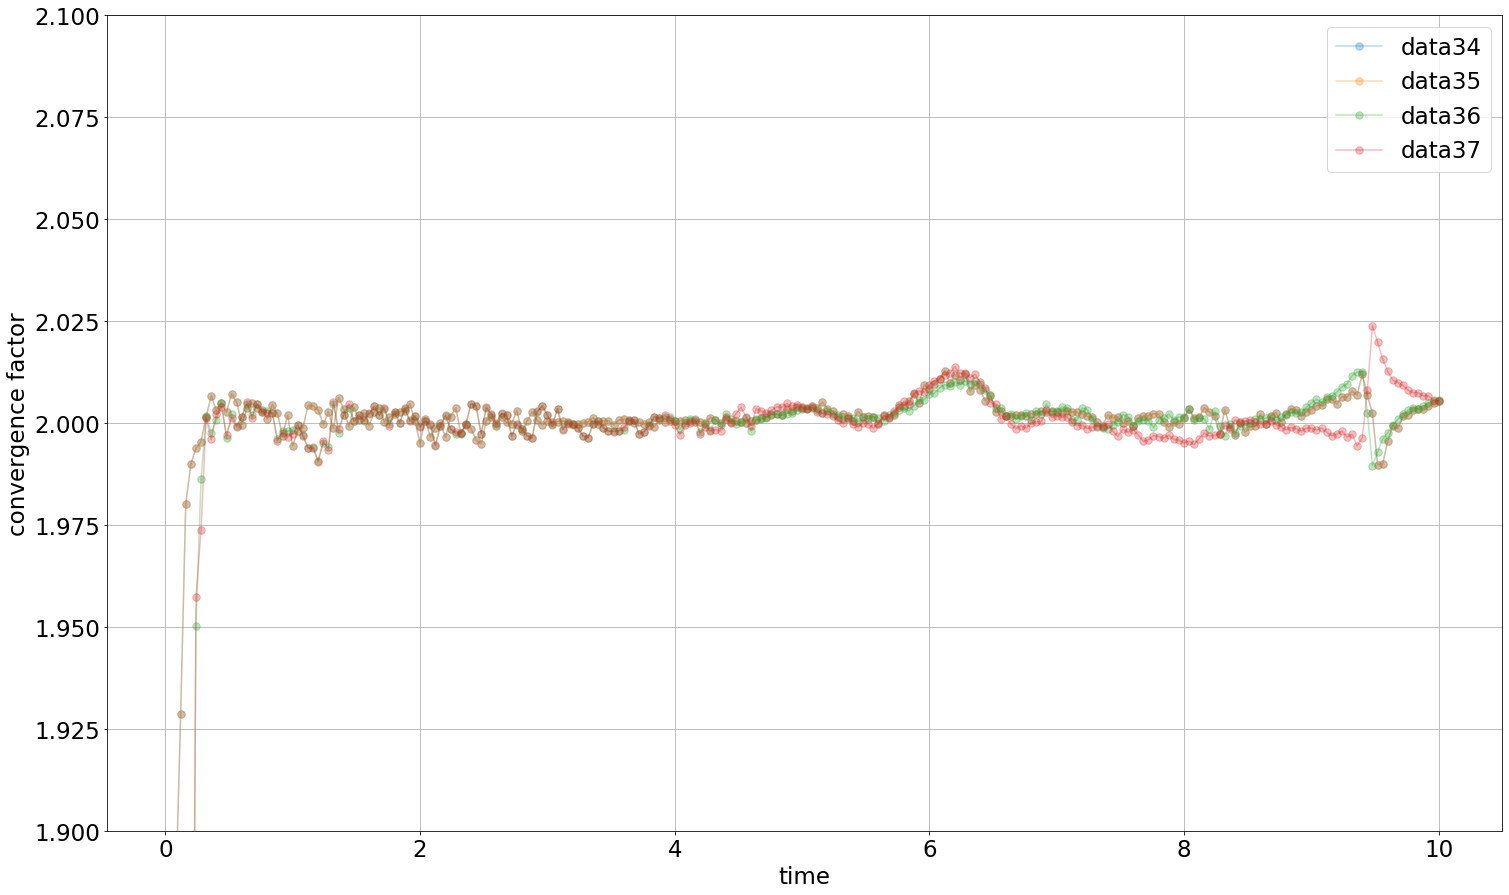

In [37]:
allruns_self_conv_test_vect = []
self_conv_test_vect = []
"""
for i,t in enumerate(times[::2]):
        self_conv_test_vect.append(self_conv_test(big_DF[0][0][i],big_DF[0][1][i],big_DF[0][2][i]))
        allruns_self_conv_test_vect.append(self_conv_test_vect)
#plt.plot(times[::2], self_conv_test_vect,markersize=10,alpha=0.5,label=label_vector[0])
"""
for n in range(0,4):
    self_conv_test_vect = []
    for i,t in enumerate(times):
        self_conv_test_vect.append(self_conv_test(big_DF[n][0][i],big_DF[n][1][i],big_DF[n][2][i]))
    allruns_self_conv_test_vect.append(self_conv_test_vect)
    plt.plot(times, self_conv_test_vect,'.-',markersize=15,alpha=0.3,label="data"+str(n+shift1))
#plt.xlim(0,40)
plt.ylim(1.9,2.1)
#plt.xlabel('time')
plt.ylabel('convergence factor')
plt.xlabel('time')
#plt.vlines(9.4,0,2.5,alpha=0.5,label="time = 9.4")
plt.grid()
plt.legend()


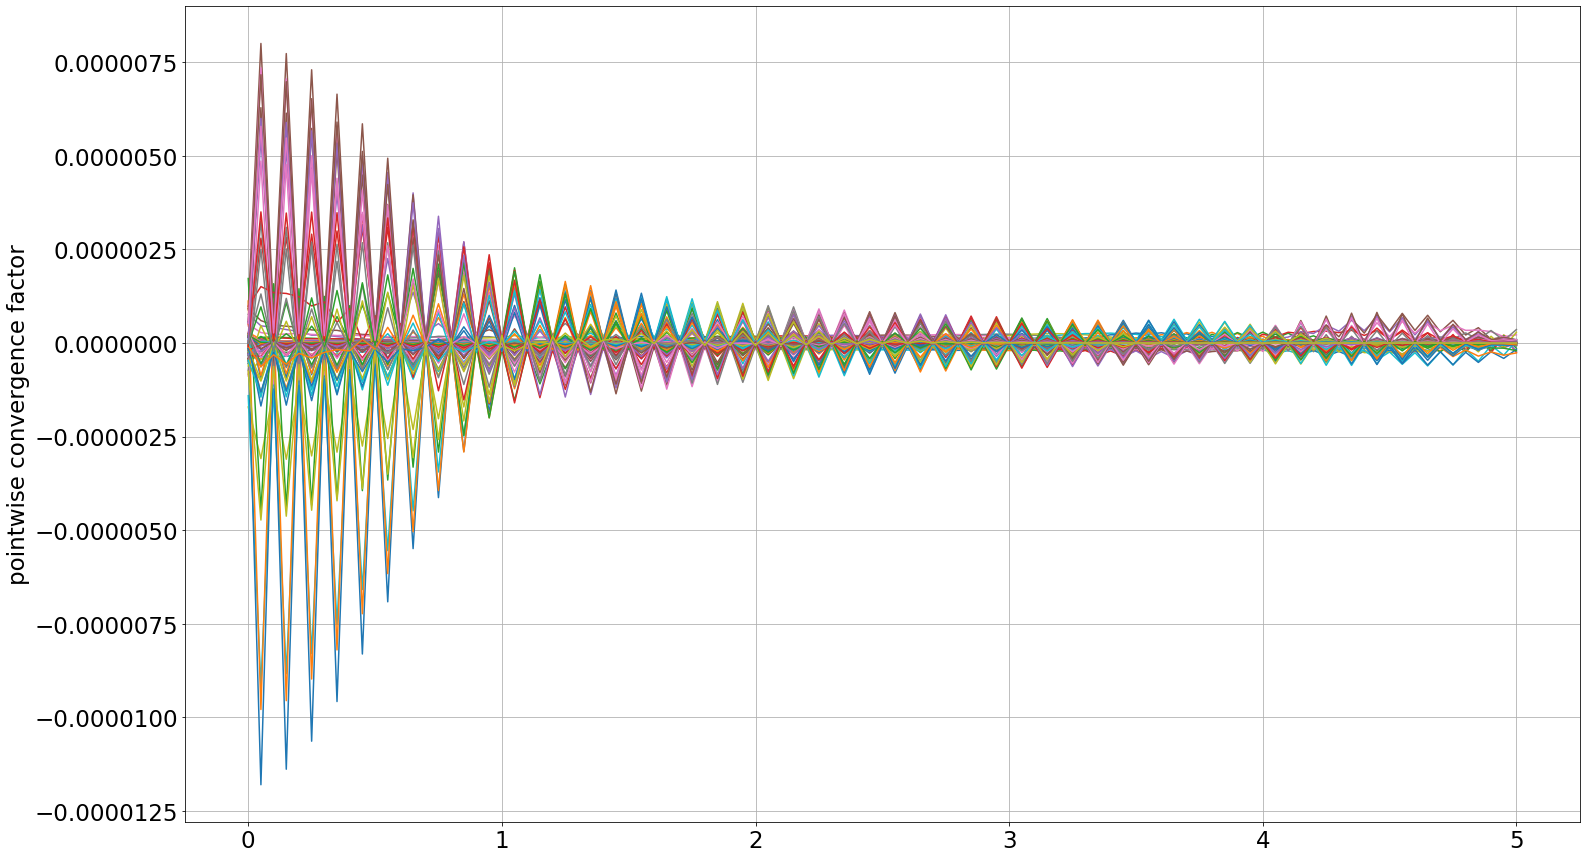

In [98]:
for j in range(0,number_step-1):
    plt.plot(big_DF[n_ind][0][0]['x'],self_conv_test_vect_pw[j][0]-self_conv_test_vect_pw[j][1],markersize=15)
    #plt.hlines(np.mean(self_conv_test_vect_pw[j]),-5,5,alpha=0.4)

#plt.plot(times,self_conv_test_vect_pw,label="conv_test")
#plt.xlim(-3.5,-3.7)
#plt.ylim(1.95,2.1)
#plt.xlabel('time')
plt.ylabel('pointwise convergence factor')
plt.grid()
#plt.legend()
#print(self_conv_test_vect_pw[-24])

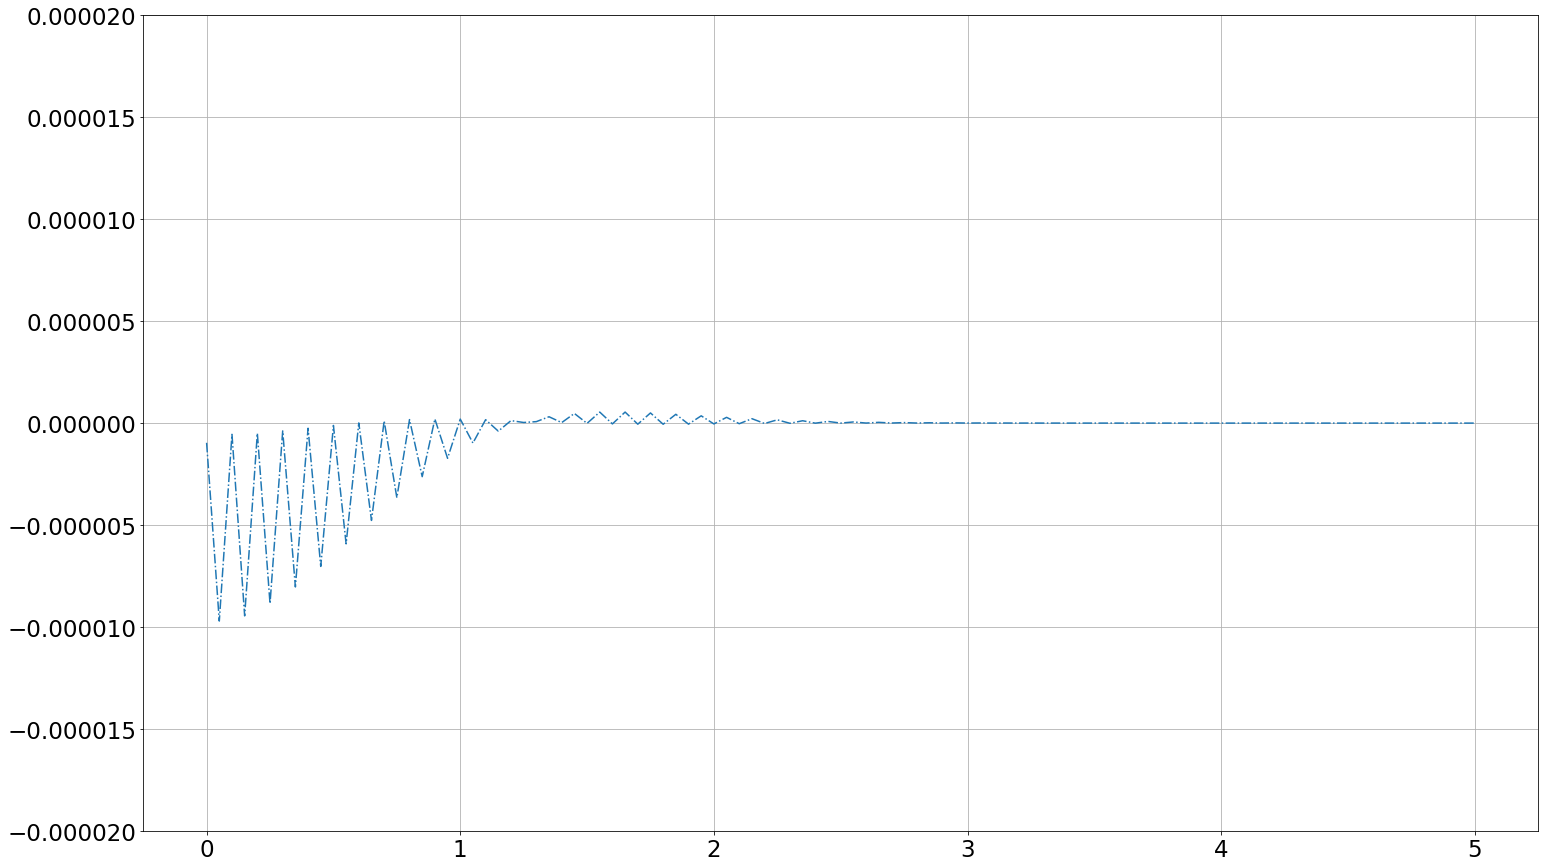

In [100]:
fig, ax = plt.subplots()

line1, = ax.plot(big_DF[n_ind][0][1]['x'], self_conv_test_vect_pw[1][0]-self_conv_test_vect_pw[1][1],'-.')
#line2, = ax.plot(DF[0][1]['x'], self_conv_test_vect_pw[1][1],'.')
plt.grid()
plt.ylim(-0.00002,0.00002)


def animate1(i):
    line1.set_ydata(self_conv_test_vect_pw[i][0]-self_conv_test_vect_pw[i][1])  # update the data.
    return line1,

#def animate2(i):
#    line2.set_ydata(self_conv_test_vect_pw[i][0])  # update the data.
#    return line2,


ani = animation.FuncAnimation(
    fig, animate1, interval=80, blit=True, frames=number_step)
ani.save("pw_conv.mp4")



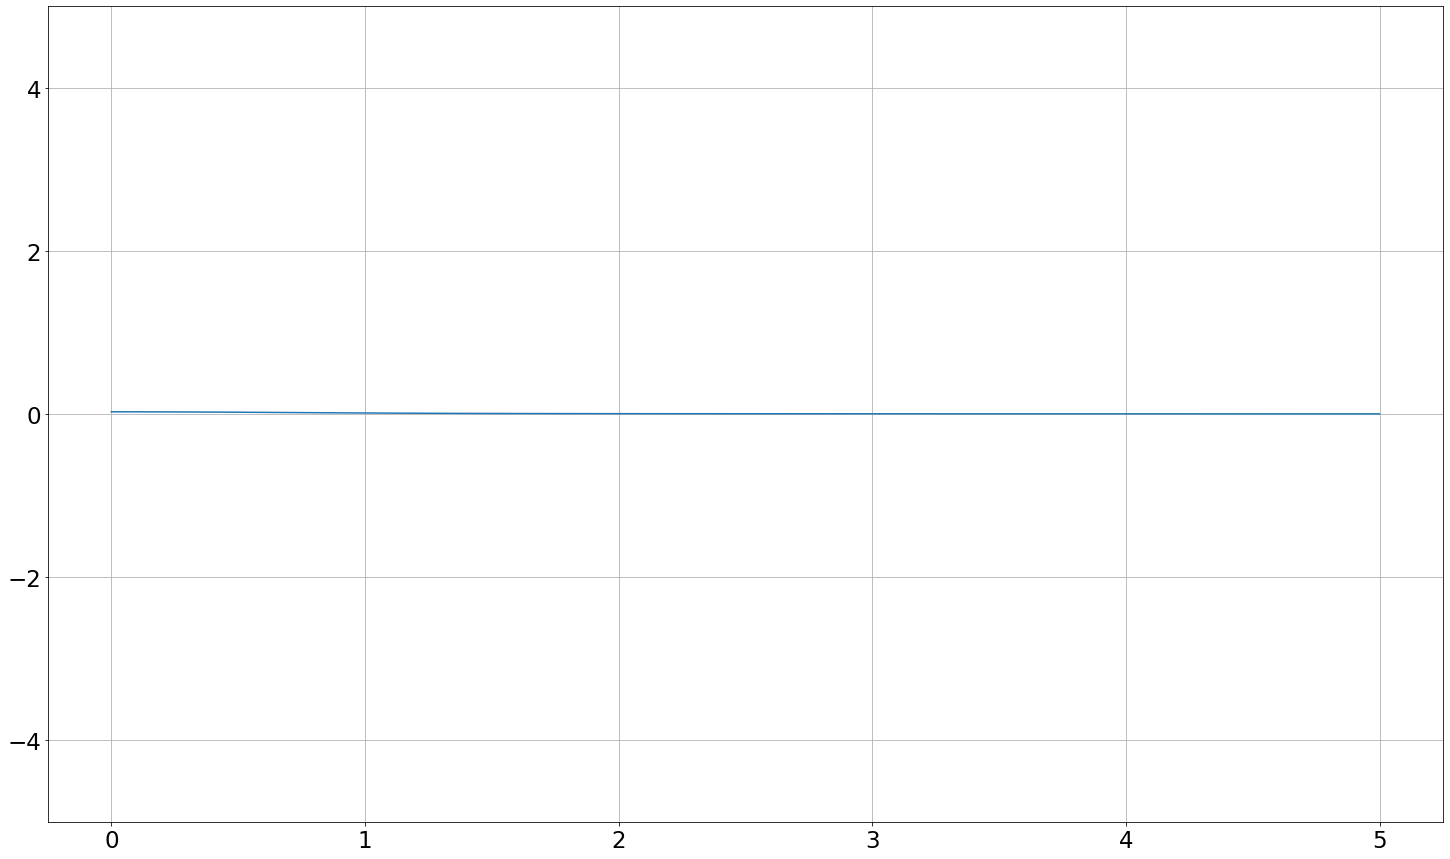

In [70]:
fig, ax = plt.subplots()
field = 0
n_ind = 2
big_DF_ind = 2
data_name = "./data/log_comp/data6/field"+str(field)+".mp4"
line, = ax.plot(big_DF[big_DF_ind][0][0]['x'], big_DF[big_DF_ind][0][0]['field'+str(field)])
plt.ylim(-5,5)
#plt.xlim(-5,0)
plt.grid()

def animate(i):
    #line.set_xdata(DF[0][i]['x'])
    line.set_ydata(big_DF[big_DF_ind][0][i]['field'+str(field)])  # update the data.
    return line,


ani = animation.FuncAnimation(
    fig, animate, interval=100, blit=True, save_count=number_step-1)
ani.save(data_name)



In [49]:
fig = plt.figure()
ax1 = plt.axes(ylim=(-0.0006,0.0006),xlim=(-5,5))
line, = ax1.plot([], [])
plt.xlabel('x')
plt.ylabel('differences')
plt.ylim(-0.000001,0.000001)
plotlays, plotcols = [3], ["blue","orange","red"]
lines = []
for index in range(3):
    lobj = ax1.plot([],[],lw=3,color=plotcols[index],alpha=0.6)[0]
    lines.append(lobj)

    
x1,y1 = [DF[0][0]['x']],[ DF[0][0]['field0']]
x2,y2 = [DF[1][0]['x']],[ DF[1][0]['field0']]
x3,y3 = [DF[2][0]['x']],[ DF[2][0]['field0']]


def init():
    for line in lines:
        line.set_data([x1,x2,x3],[y1,y2,y3])
    return lines





def animate(i):

    x1 = DF[0][0]['x']
    y1 = DF[0][i]['field0']
    #x1.append(x)
    #y1.append(y)

    x2 = DF[1][0]['x']
    y2 = DF[1][i]['field0']
    #x2.append(x)
    #y2.append(y)
    
    x3 = DF[2][0]['x']
    y3 = DF[2][i]['field0']

    xlist = [x1, x2, x3]
    ylist = [y1, y2, y3]

    #for index in range(0,1):
    for lnum,line in enumerate(lines):
        line.set_data(xlist[lnum], ylist[lnum]) # set data for each line separately. 

    return lines

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=number_step-1, interval=200, blit=True)

plt.grid()
plt.show()
anim.save("fields.mp4")

ValueError: setting an array element with a sequence.

<Figure size 1800x1080 with 1 Axes>